In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine, reflect=True)


In [23]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [24]:
# Save references to each table

measurement = Base.classes.measurement
stations = Base.classes.station



In [25]:
# Create our session (link) from Python to the DB

session=Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-22


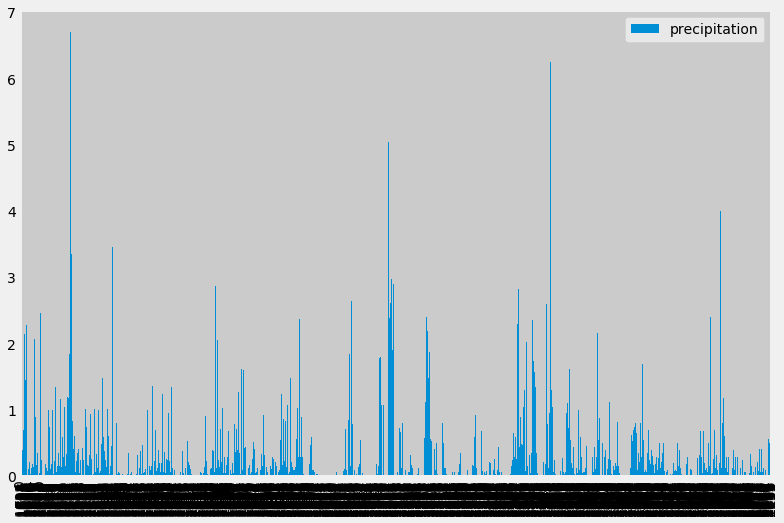

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

max_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Starting from the most recent data point in the database. 

session.query(measurement.date).order_by(measurement.date.desc()).first()


# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores

query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(query,columns=['date', 'precipitation'])


# Sort the dataframe by date

precipitation_df = precipitation_df.sort_values(by='date',ascending=True)
precipitation_df.head()


# Use Pandas Plotting with Matplotlib to plot the data

precip_plot = precipitation_df.plot(kind='bar', width=3, figsize=(12,8))






In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()

,precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset

session.query(stations.id).count()


9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

most_active = session.query(measurement.station, func.count(measurement.station)).\
              group_by(measurement.station).\
              order_by(func.count(measurement.station).desc()).all
most_active

# List the stations and the counts in descending order.






<bound method Query.all of <sqlalchemy.orm.query.Query object at 0x7fa6c2245650>>

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.




In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [33]:
# Close Session
session.close()